# <strong><u>MULTIPLE LINEAR REGRESSION</u>:</strong>


---

In [65]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

## <strong><u>Exploratory Data Analysis</u>:</strong>


<strong>Remidner</strong>: The objective of the exploratory phase is to determine which variables are viable candidates as independent variables, via which the dependent/target variable can be predicted.

In [66]:
# Loading and previewing the dataset
dfa = pd.read_csv("..//csv_datasets//mReg_FuelConsumptionCo2.csv")

dfa.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [67]:
# Searching for candidates with continuous distributions pt. 1

dfa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


In [68]:
# Searching for candidates with continuous distributions pt. 2

dfa.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [69]:
# Extracting candidates with continuous distributions

dfb = dfa[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS']]
dfb.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,196
1,2.4,4,11.2,7.7,9.6,221
2,1.5,4,6.0,5.8,5.9,136
3,3.5,6,12.7,9.1,11.1,255
4,3.5,6,12.1,8.7,10.6,244
5,3.5,6,11.9,7.7,10.0,230
6,3.5,6,11.8,8.1,10.1,232
7,3.7,6,12.8,9.0,11.1,255
8,3.7,6,13.4,9.5,11.6,267


---

## <strong><u>Exploring Linearity of Feature Candidates</u>:</strong>

The following are candidates for features for the machine learning modeL:

<ol>
<li> ENGINESIZE
<li> CYLINDERS
<li> FUELCONSUMPTION_CITY
<li> FUELCONSUMPTION_HWY
<li> FUELCONSUMPTION_COMB
</ol>

<strong><u>ENGINE SIZE</u>:</strong>

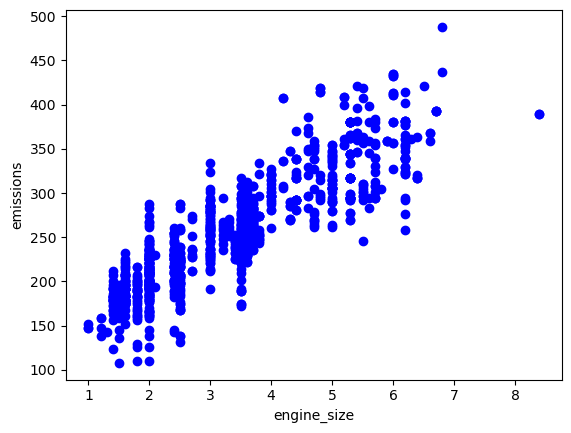

In [57]:
# Engine Size in relation to Emissions

plt.scatter(dfb.ENGINESIZE, dfb.CO2EMISSIONS, color='blue')
plt.xlabel('engine_size')
plt.ylabel('emissions')
plt.show()

<strong><u>CYLINDERS</u>:</strong>

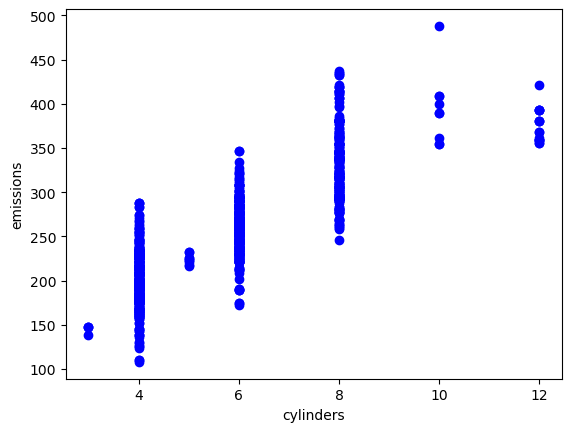

In [58]:
# Cylinders in relation to Emissions

plt.scatter(dfb.CYLINDERS, dfb.CO2EMISSIONS, color='blue')
plt.xlabel('cylinders')
plt.ylabel('emissions')
plt.show()

The above reltionship may serve some use with <strong>logistic rergession</strong>, however this will <strong>not</strong> be of good use with linear regression

<strong><u>FUEL CONSUMPTION CITY</u>:</strong>

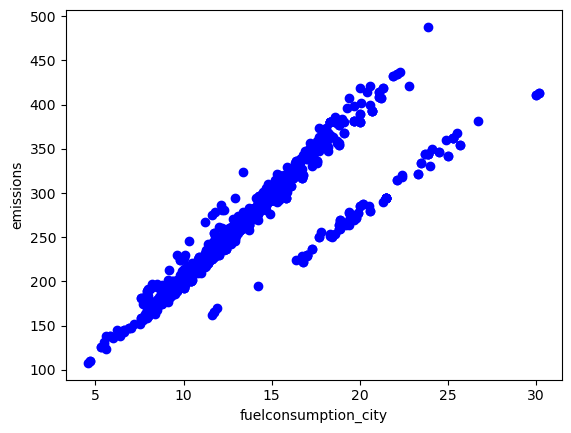

In [59]:
# Fuel Consumption City in relation to Emissions

plt.scatter(dfb.FUELCONSUMPTION_CITY, dfb.CO2EMISSIONS, color='blue')
plt.xlabel('fuelconsumption_city')
plt.ylabel('emissions')
plt.show()

<strong><u>FUEL CONSUMPTION HWY</u>:</strong>

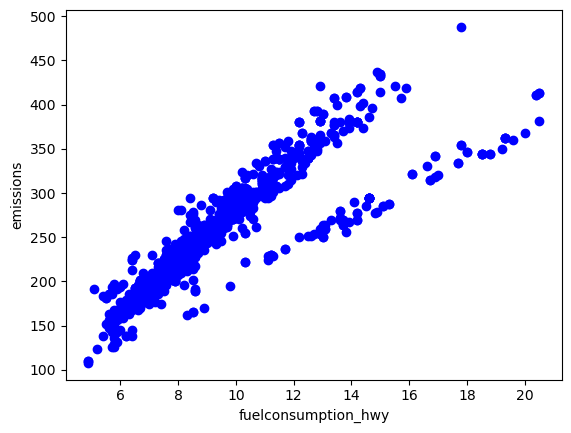

In [60]:
# Cylinders in relation to Emissions

plt.scatter(dfb.FUELCONSUMPTION_HWY, dfb.CO2EMISSIONS, color='blue')
plt.xlabel('FUELCONSUMPTION_HWY'.lower())
plt.ylabel('emissions')
plt.show()

<strong><u>FUEL CONSUMPTION COMB</u>:</strong>

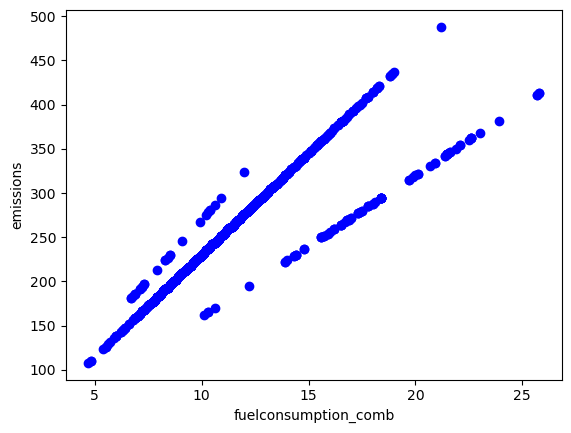

In [62]:
# Cylinders in relation to Emissions

plt.scatter(dfb.FUELCONSUMPTION_COMB, dfb.CO2EMISSIONS, color='blue')
plt.xlabel('FUELCONSUMPTION_COMB'.lower())
plt.ylabel('emissions')
plt.show()

Out of the above, we can<strong> only use the following</strong> as features:

<ol>
<li> Engine Size
<li> Fuel Consumption City
<li> Fuel Consumption HWY
<li> Fuel Consumption Comb
</ol>

---

## <strong><u>Developing the M.L. Model</u>:</strong>

In [ ]:
msk1 = np.ranodm.rand(len(dfb)) < 0.8
train1 = dfb[msk1]
test1 = dfb[~msk1]

train1_x = train1[['ENGINESIZE', ]]
